In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data=pd.read_csv('C:/Users/Tom/git/pythonProject/absenteeism/Absenteeism_at_work.csv', sep=';')

print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0 

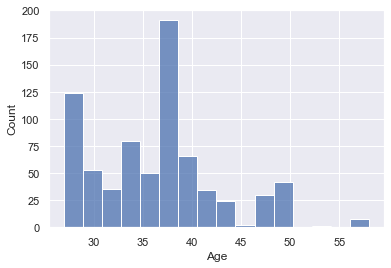

"age_hist = plt.hist(data['Age'], bins='auto')\nplt.show()\n\nreason_hist = plt.hist(data['Reason for absence'], bins='auto')\nplt.show()"

In [3]:
sns.set_theme(style="darkgrid")
sea_age = sns.histplot(x=data['Age'])
plt.show()

"""age_hist = plt.hist(data['Age'], bins='auto')
plt.show()

reason_hist = plt.hist(data['Reason for absence'], bins='auto')
plt.show()"""